In [5]:
import torch
from wrapper import Ex2mcmc
from torch.distributions import MultivariateNormal as MNormal, Normal
from matplotlib import pyplot as plt

In [6]:
class Funnel(object):
    """
    Funnel distribution.

    “Slice sampling”. R. Neal, Annals of statistics, 705 (2003) https://doi.org/10.1214/aos/1056562461

    Args:
        dim - dimension
        nu - parameter
    """
    def __init__(self, dim: int):
        self._dim = dim
        self.a = 3
        self.normal_last = Normal(0, self.a)

    @property
    def dim(self) -> int:
        return self._dim
    
    def log_prob(self, x: torch.FloatTensor) -> torch.FloatTensor:
        """
        Returns:
            log p(x)
        """

        normal_first = Normal(torch.zeros(x.shape[:-1], device=x.device), torch.exp(x[..., -1] / 2.))
        return normal_first.log_prob(x[..., :-1].permute(-1, *range(x.ndim-1))).sum(0) + \
            self.normal_last.log_prob(x[..., -1])

In [7]:
dim = 100
step_size = 0.1
n_samples = 1000
burn_in = 500
n_particles = 2000
n_mala_steps = 3
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
target = Funnel(dim=dim) # тут встамим это или нормальное
proposal = MNormal(torch.zeros(dim, device=device), 1 ** 2 * torch.eye(dim, device=device)) # здесь твоя сетка c методами log_prob и sample


instance = Ex2mcmc(dim, target, proposal, n_samples, burn_in, step_size, n_particles, n_mala_steps)

In [8]:
chains = instance.run()

100%|██████████| 1500/1500 [00:27<00:00, 54.03it/s]


Text(0.5, 1.0, 'Ex2MCMC samples')

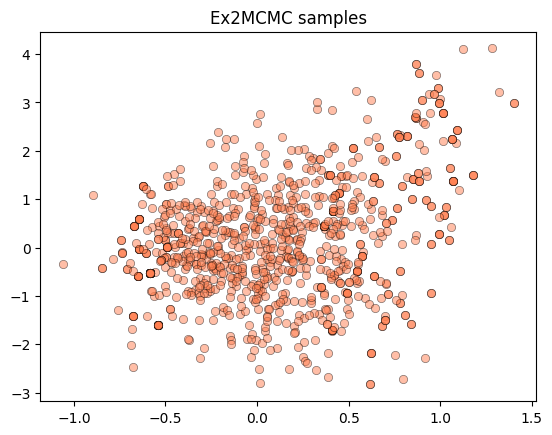

In [9]:
PROJ_DIM1 = -1
PROJ_DIM2 = -2
plt.scatter(chains.view(-1, dim)[:, PROJ_DIM1], chains.view(-1, dim)[:, PROJ_DIM2], c='coral', edgecolors='black', linewidth=0.5, alpha=0.5, marker='o',)
plt.title(r'Ex2MCMC samples')